**Opti & Contrôle - TP1**

DESFORGES Guillaume & DUMONT Louis

In [23]:
import numpy as np

In [24]:
from src import datas_r

# Problème primal

On s'intéresse au problème primal d'optimisation **sans contraintes**.

## Résultats théoriques

*TODO*
- Montrer que les problèmes (13), (14) et (19) sont équivalents.
- Montrer que les problèmes (14) et (19) admettent chacun une solution unique, et que les critères de ces 2 problèmes sont strictement (mais pas fortement) convexes.

On calcule "à la main" les formules du gradient et de la hessienne, on obtient:

Pour le gradient:

$\nabla_{q_c}(J) = B^T (r \bullet q \bullet |q| + A_r^T p_r)$

Pour la Hessienne:

$H_{q_c}(J) = 2B^T (r \bullet |q| \bullet B^T)^T $

Où l'on a étendu la diffinition de $\bullet$: en $v\bullet A$ est le produit matriciel de la matrice diagonale $diag(v_0 ,..., v_n)$ et de $X$.

Pour ce qui est des équivalences demandées, 

## Oracle

On implémente un **oracle**, c'est à dire une fonction qui puise dans les données du problème pour donner à l'algorithme d'optimisation les informations qui lui sont nécessaire : valeur du critère, vecteur gradient du critère et si demandé matrice Hessienne du critère.

In [25]:
from src.oracle import oracle

In [26]:
x0 = np.random.normal(size=datas_r.n-datas_r.md)

In [27]:
print("Test de l'oracle")
# test pour une valeur aléatoire
loss, gradient, hessian = oracle(x0, compute_hessian=True)
print("Critère :", loss)
print("Gradient :", gradient)
print("Hessienne :", hessian)

Test de l'oracle
Critère : 36053.50755987934
Gradient : [    35.37353713  -1693.17153011  -1833.85548356  -1866.98737761
 -27005.5637839     729.04368037  26113.08990732   -171.26096492
    675.48377472]
Hessienne : [[   39.49978997     0.             0.             0.
    -38.11868348     0.             0.             0.
      0.        ]
 [    0.          1268.09616591   983.15347128   746.34382696
   1246.36793773 -1246.36793773 -1246.36793773   263.21446645
  -1246.36793773]
 [    0.           983.15347128  1384.28365825  1039.0643799
   1076.91608215 -1354.4502648  -1076.91608215     0.
  -1076.91608215]
 [    0.           746.34382696  1039.0643799   1288.59856255
    840.10643784 -1039.0643799   -840.10643784     0.
   -840.10643784]
 [  -38.11868348  1246.36793773  1076.91608215   840.10643784
  17658.65350589 -1340.1305486  -9573.01942685   263.21446645
  -1340.1305486 ]
 [    0.         -1246.36793773 -1354.4502648  -1039.0643799
  -1340.1305486   5191.53875886  2345.62604597

## Descentes de gradient à pas fixe ou à pas optimal

Dans un premier temps, on implémente la descente de gradient à pas fixe :

In [28]:
from src.gradient import gradient

### Test

On teste la descente de gradient à pas fixe sur un problème trivial : $x^2$.

Descente de gradient à pas fixe :
Iter : 0 ; gradient_step=0.1 ; gradient_norm=4.0
Iter : 1 ; gradient_step=0.1 ; gradient_norm=3.2
Iter : 2 ; gradient_step=0.1 ; gradient_norm=2.56
Iter : 3 ; gradient_step=0.1 ; gradient_norm=2.048
Iter : 4 ; gradient_step=0.1 ; gradient_norm=1.6384
Iter : 5 ; gradient_step=0.1 ; gradient_norm=1.31072
Iter : 6 ; gradient_step=0.1 ; gradient_norm=1.0485760000000002
Iter : 7 ; gradient_step=0.1 ; gradient_norm=0.8388608000000002
Iter : 8 ; gradient_step=0.1 ; gradient_norm=0.6710886400000001
Iter : 9 ; gradient_step=0.1 ; gradient_norm=0.5368709120000001
Iter : 10 ; gradient_step=0.1 ; gradient_norm=0.4294967296000001
Iter : 11 ; gradient_step=0.1 ; gradient_norm=0.3435973836800001
Iter : 12 ; gradient_step=0.1 ; gradient_norm=0.27487790694400005
Iter : 13 ; gradient_step=0.1 ; gradient_norm=0.21990232555520003
Iter : 14 ; gradient_step=0.1 ; gradient_norm=0.17592186044416003
Iter : 15 ; gradient_step=0.1 ; gradient_norm=0.140737488355328
Iter : 16 ; gr

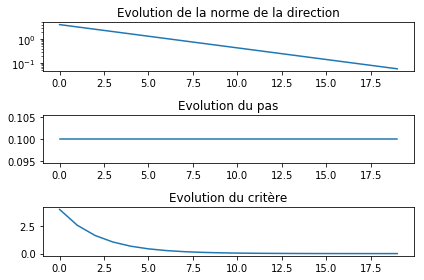

In [29]:
# oracle test : la fonction carré en 1 dimension
oracle_test = lambda x: (x**2, np.array(x*2), None)
print("Descente de gradient à pas fixe :")
result_pas_fixe = gradient(oracle_test, np.array([2]), iter_max=20, default_gradient_step=0.1, threshold=1e-16, use_wolfe=False, verbose=True)

On constate une convergence lente pour un problème simple. Une solution est alors d'augmenter le pas du gradient, mais ce n'est pas suffisant pour un problème plus complexe. On utilise alors l'algorithme de Wolfe pour trouver le pas optimal.

In [30]:
print("Descente de gradient à pas optimal :")
result_pas_opti = gradient(oracle_test, np.array([2]), iter_max=50, threshold=1e-16, verbose=True, visual=False)

Descente de gradient à pas optimal :
Iter : 0 ; gradient_step=0.5 ; gradient_norm=4.0
Iteration : 1
Temps CPU : 0.0
Critere optimal : [0.]
Norme du gradient : 0.0
X optimal : [0.]


Comme on pouvait s'y attendre, sur un problème convexe à une dimension la solution optimale est trouvée immédiatement.

### Utilisation sur le problème

On peut utiliser ces algorithmes sur notre problème :

PAS FIXE :
Iteration : 4999
Temps CPU : 0.578125
Critere optimal : -3.733547454057762
Norme du gradient : 0.08040470695481186
X optimal : [ 0.30038465 -0.01713663  0.16249284  0.43063644  0.03815312 -0.0160585
 -0.15148629 -0.11924518  0.18450032]


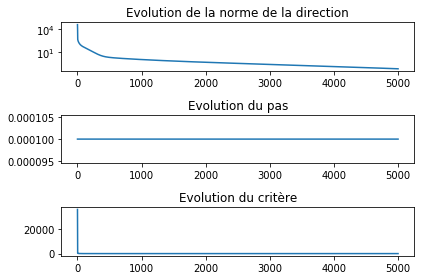

In [31]:
print("PAS FIXE :")
result = gradient(oracle, x0, default_gradient_step=0.0001, use_wolfe=False)

PAS OPTIMAL :
Iteration : 292
Temps CPU : 0.484375
Critere optimal : -3.7340070480435017
Norme du gradient : 9.232362816947086e-07
X optimal : [ 0.31167057 -0.01749637  0.16279675  0.4306519   0.03817885 -0.01562977
 -0.15147633 -0.11908204  0.18404951]


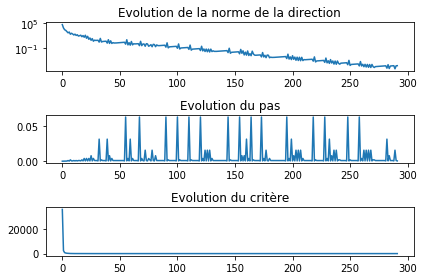

In [32]:
print("PAS OPTIMAL :")
result = gradient(oracle, x0)

## Gradient conjugué

On implémente la méthode de gradient conjugué non linéaire avec l'algorithme de Polak-Ribière.

In [33]:
from src.gradient_conjug_polak import gradient_polak

Iteration : 294
Temps CPU : 0.53125
Critere optimal : -3.7340070480435585
Norme du gradient : 8.582881855162146e-07
X optimal : [ 0.3116707  -0.01749637  0.16279675  0.4306519   0.03817885 -0.01562978
 -0.15147633 -0.11908204  0.18404951]


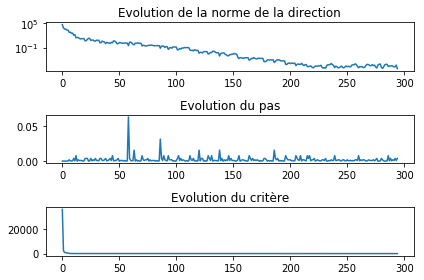

In [34]:
result_polak = gradient_polak(oracle, x0)

## Méthode de Newton

On implémente la méthode de Newton.

In [35]:
from src.newton import newton

Iteration : 8
Temps CPU : 0.015625
Critere optimal : -3.734007048043553
Norme de la direction : 6.2963431016376745e-09
X optimal : [ 0.3116707  -0.01749637  0.16279674  0.4306519   0.03817885 -0.01562978
 -0.15147633 -0.11908204  0.18404951]


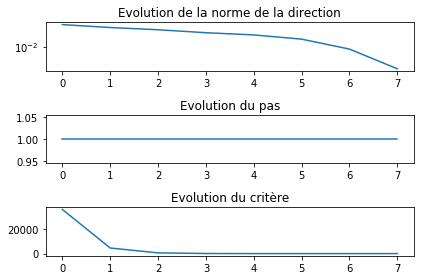

In [36]:
result_newton = newton(oracle, x0)

## Méthode quasi-Newton (BFGS)

On implémente la méthode dite "quasi-Newton" BFGS, qui utilise une approximation de l'inverse du hessien.

In [37]:
from src.bfgs import bfgs

Iteration : 43
Temps CPU : 0.046875
Critere optimal : -3.7340070480435585
Norme du gradient : 7.420198388549211e-07
X optimal : [ 0.3116707  -0.01749637  0.16279675  0.4306519   0.03817885 -0.01562978
 -0.15147633 -0.11908204  0.18404951]


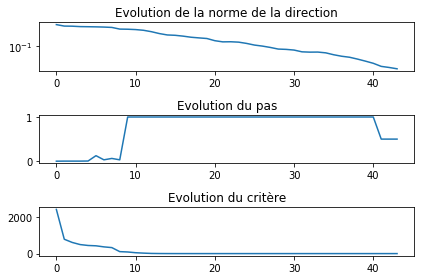

In [38]:
result_bfgs = bfgs(oracle, x0)

# Problème dual

## Résultats théoriques

*TODO*

- Ecrire le lagrangien associé au problème sous contraintes (14) et ses conditions d’optimalité ;
- Vérifier que ces conditions correspondent aux équations (6) et (8) de l’équilibre du réseau.

- Constater que la minimisation en $q$ du lagrangien se fait de manière explicite ;
- Donner l’expression de l’argmin $q^♯$ en fonction du multiplicateur dual $\lambda$ et calculer les expressions de la fonction duale $\Phi$, de son gradient et de son hessien en fonction de $\lambda$.

## Oracle

On implémente l'oracle avec le Lagrangien :

In [39]:
from src.oracle_lagrange import oracle

## Résolution

On résoud le problème dual grâce aux algorithmes précédents :

PAS FIXE :
Iteration : 149999
Temps CPU : 22.96875
Critere optimal : 3.7703060307580363
Norme du gradient : 0.014671945101197485
X optimal : [105.38387712 123.55167772 103.99999817  85.65756138 102.61017381
 104.93934787 103.0228128   84.10698905  70.72621797 102.64959512
  74.00794819  98.69067339 104.02223783]


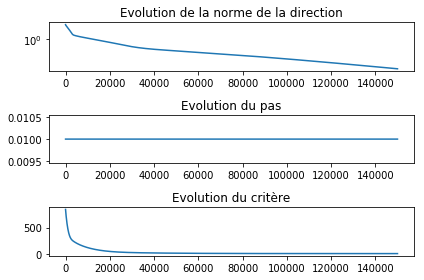

In [51]:
print("PAS FIXE :")
u0 = np.random.normal(size=datas_r.md)
result = gradient(oracle, u0, default_gradient_step=0.01, use_wolfe=False, iter_max =150000)

PAS OPTIMAL :
Iteration : 149999
Temps CPU : 126.390625
Critere optimal : 849.8246352859427
Norme du gradient : 7.580683719024472
X optimal : [ 0.33823972  0.17603779  0.77378128 -0.27123615  1.44853512 -0.54715002
  0.77422109  1.31628272  0.91650468 -1.0758628   1.32655295 -1.23483979
 -1.54684792]


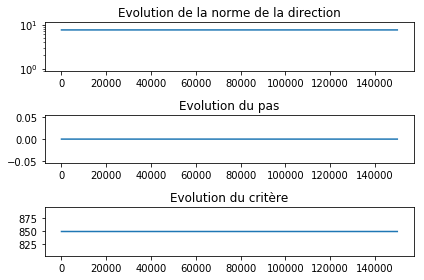

In [53]:
print("PAS OPTIMAL :")
result = gradient(oracle, u0, iter_max=15000)

Iteration : 14999
Temps CPU : 13.5625
Critere optimal : 849.8246352859427
Norme du gradient : 7.580683719024472
X optimal : [ 0.33823972  0.17603779  0.77378128 -0.27123615  1.44853512 -0.54715002
  0.77422109  1.31628272  0.91650468 -1.0758628   1.32655295 -1.23483979
 -1.54684792]


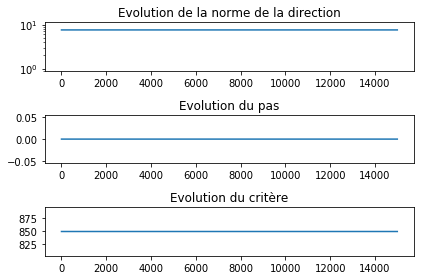

In [54]:
result_polak = gradient_polak(oracle, u0, iter_max=15000)

Iteration : 28
Temps CPU : 0.03125
Critere optimal : 3.7340070480435643
Norme de la direction : 8.032328981693061e-07
X optimal : [105.41805317 123.61133274 104.00306123  87.5987981  102.76777514
 105.0652271  103.13094635  86.14117387  73.86777589 102.79220412
  76.43426065  99.3793385  104.02861377]


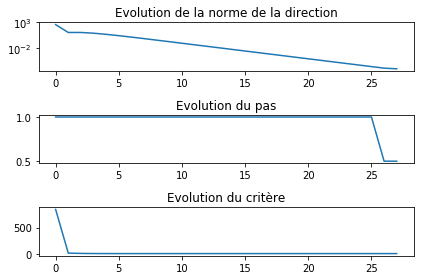

In [43]:
result_newton = newton(oracle, u0)

In [44]:
result_bfgs = bfgs(oracle, u0)

C:\Users\Louis\Documents\CoursPonts\2A\Info\Opti_Controle\Projet-Opti-Controle\src\bfgs.py:39: RuntimeWarning: invalid value encountered in true_divide
  aux_xg = np.outer(delta_x, delta_grad)/np.vdot(delta_grad, delta_x)
C:\Users\Louis\Documents\CoursPonts\2A\Info\Opti_Controle\Projet-Opti-Controle\src\bfgs.py:41: RuntimeWarning: invalid value encountered in true_divide
  aux_gx = np.outer(delta_grad, delta_x)/np.vdot(delta_grad, delta_x)
C:\Users\Louis\Documents\CoursPonts\2A\Info\Opti_Controle\Projet-Opti-Controle\src\bfgs.py:43: RuntimeWarning: invalid value encountered in true_divide
  aux_xx = np.outer(delta_x, delta_x)/np.vdot(delta_grad, delta_x)
C:\Users\Louis\Documents\CoursPonts\2A\Info\Opti_Controle\Projet-Opti-Controle\src\oracle_lagrange.py:13: RuntimeWarning: invalid value encountered in sign
  s = np.sign(a)


KeyboardInterrupt: 